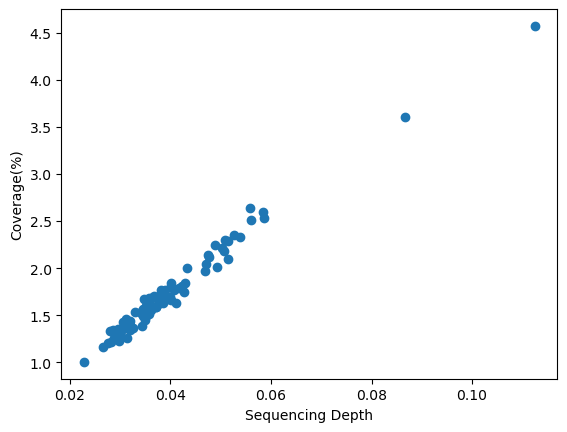

In [2]:
import os
import matplotlib.pyplot as plt

def read_folder_names(file_path):
    folder_names = []
    with open(file_path, 'r') as file:
        for line in file:
            folder_name = line.strip().replace('_minimap2_output.txt', '')
            folder_names.append(folder_name)
    return folder_names


#calculate_theoretical_coverage
def calculate_theoretical_coverage(fastq_path, reference_genome_size):
    base_count = 0
    line_counter = 0  # track record
    
    with open(fastq_path, 'r') as file:
        for line in file:
            stripped_line = line.strip()
            
            if line.startswith('@'):
                line_counter = 1  # first line
            else:
                line_counter += 1
                
            # only caculate the second line
            if line_counter == 2 and stripped_line:
                base_count += len(stripped_line)
    
    return base_count / reference_genome_size

def get_theoretical_coverage(folder_path, folder_names, reference_genome_size):
    theoretical_coverages = {}
    for folder_name in folder_names:
        for file in os.listdir(folder_path):
            if file.endswith('.fastq') and folder_name in file:
                coverage = calculate_theoretical_coverage(os.path.join(folder_path, file), reference_genome_size)
                theoretical_coverages[folder_name] = coverage
                break
    return theoretical_coverages

# actual_coverage
def get_actual_coverage(new_path, folder_names):
    actual_coverages = {}
    for folder_name in folder_names:
        coverage_file = os.path.join(new_path, folder_name, 'coverage_percentage.txt')
        if os.path.exists(coverage_file):
            with open(coverage_file, 'r') as file:
                coverage = float(file.read().strip())
                actual_coverages[folder_name] = coverage
    return actual_coverages


def plot_coverages(theoretical_coverages, actual_coverages):
    x = [theoretical_coverages[name] for name in theoretical_coverages]
    y = [actual_coverages[name] for name in actual_coverages if name in theoretical_coverages]

    plt.scatter(x, y)
    plt.xlabel('Sequencing Depth')
    plt.ylabel('Coverage(%)')
    plt.show()


#def plot_combined_coverages(theoretical_coverages_1, actual_coverages_1, theoretical_coverages_2, actual_coverages_2,theoretical_coverages_3, actual_coverages_3,theoretical_coverages_4, actual_coverages_4):
def plot_combined_coverages(theoretical_coverages_1, actual_coverages_1):
    # first group, blue
    x1 = [theoretical_coverages_1[name] for name in theoretical_coverages_1]
    y1 = [actual_coverages_1[name] for name in actual_coverages_1 if name in theoretical_coverages_1]
    plt.scatter(x1, y1, color='blue', marker='o', label='Bacillus', s = 10)

    # second group, red
    #x2 = [theoretical_coverages_2[name] for name in theoretical_coverages_2]
    #y2 = [actual_coverages_2[name] for name in actual_coverages_2 if name in theoretical_coverages_2]
    #plt.scatter(x2, y2, color='red', marker='x', label='Ecoli', s = 10)

    # third group, green
    #x3 = [theoretical_coverages_3[name] for name in theoretical_coverages_3]
    #y3 = [actual_coverages_3[name] for name in actual_coverages_3 if name in theoretical_coverages_3]
    #plt.scatter(x3, y3, color='green', marker='^', label='Staphylococcus', s = 10)

    # fourth group, black
    #x4 = [theoretical_coverages_4[name] for name in theoretical_coverages_4]
    #y4 = [actual_coverages_4[name] for name in actual_coverages_4 if name in theoretical_coverages_4]
    #plt.scatter(x4, y4, color='black', marker='s', label='Klebsiella', s = 10)

    plt.xlabel('Sequencing Depth')
    plt.ylabel('Coverage(%)')
    plt.legend()
    plt.show()

def write_results_to_file(depths,coverages, output_path):
    with open(output_path, "w") as file:
        file.write("Filename, coverage (%), depth\n")
        for file_name, coverage in coverages.items():
            # Convert coverage and depth to float if they are not already
            depth = depths[file_name]
            try:
                coverage_float = float(coverage)
                depth_float = float(depth)
            except ValueError:
                raise ValueError(f"Coverage or depth could not be converted to float: coverage={coverage}, depth={depth}")
            
            file.write(f"{file_name}, {coverage_float:.8f}, {depth_float:.8f}\n")


def main():
    # total bases in reference genome
    reference_genome_size_Bacillus = 4224687  # change to real reference genome used
    reference_genome_size_Ecoli = 4567887  # change to real reference genome used
    reference_genome_size_Staphylococcus = 2821361  # change to real reference genome used
    reference_genome_size_Klebsiella = 5333942  # change to real reference genome used

    #input file, you should change to real file
    file_path_1 = 'fastq_list_Bacillus.txt'  
    folder_names_1 = read_folder_names(file_path_1)

    #file_path_2 = 'fastq_list_Ecoli.txt'  
    #folder_names_2 = read_folder_names(file_path_2)

    #file_path_3 = 'fastq_list_Staphylococcus.txt' 
    #folder_names_3 = read_folder_names(file_path_3)

    #file_path_4 = 'fastq_list_Klebsiella.txt' 
    #folder_names_4 = read_folder_names(file_path_4)

    # calculate_theoretical_coverage
    folder_path = './bbmap_output_many_seqs' 
    theoretical_coverages_1 = get_theoretical_coverage(folder_path, folder_names_1, reference_genome_size_Bacillus)
    #theoretical_coverages_2 = get_theoretical_coverage(folder_path, folder_names_2, reference_genome_size_Ecoli)
    #theoretical_coverages_3 = get_theoretical_coverage(folder_path, folder_names_3, reference_genome_size_Staphylococcus)
    #theoretical_coverages_4 = get_theoretical_coverage(folder_path, folder_names_4, reference_genome_size_Klebsiella)

    # get actual coverage, you should change to real file
    new_path_1 = './coverage/Bacillus/'  
    actual_coverages_1 = get_actual_coverage(new_path_1, folder_names_1)

    #new_path_2 = './coverage/Ecoli/' 
    #actual_coverages_2 = get_actual_coverage(new_path_2, folder_names_2)

    #new_path_3 = './coverage/Staphylococcus/' 
    #actual_coverages_3 = get_actual_coverage(new_path_3, folder_names_3)
    
    #new_path_4 = './coverage/Klebsiella/'  
    #actual_coverages_4 = get_actual_coverage(new_path_4, folder_names_4)
 
    # scatter plot
    plot_coverages(theoretical_coverages_1, actual_coverages_1)
    #plot_coverages(theoretical_coverages_2, actual_coverages_2)
    #plot_coverages(theoretical_coverages_3, actual_coverages_3)
    #plot_coverages(theoretical_coverages_4, actual_coverages_4)
    #plot_combined_coverages(theoretical_coverages_1, actual_coverages_1, theoretical_coverages_2, actual_coverages_2,theoretical_coverages_3, actual_coverages_3,theoretical_coverages_4, actual_coverages_4)

    output_path = "./coverage/coverage_Bacillus.txt"
    
    write_results_to_file(theoretical_coverages_1,actual_coverages_1, output_path)
    #output_path = "./coverage/coverage_Ecoli.txt"
    #write_results_to_file(theoretical_coverages_2,actual_coverages_2, output_path)

    #output_path = "./coverage/coverage_Staphylococcus.txt"
    #write_results_to_file(theoretical_coverages_3,actual_coverages_3, output_path)

    #output_path = "./coverage/coverage_Klebsiella.txt"
    #write_results_to_file(theoretical_coverages_4,actual_coverages_4, output_path)

if __name__ == "__main__":
    main()
